# Reglas de asociación

En este caso aprenderemos a manejar una tabla de datos de tipo transaccional y ver métodos para poder analizarla. También aplicaremos los conceptos de reglas de asociación en este ejemplo.

El caso estará estructurado así:

1. Explorar la estructura de una basxe de datos transaccional 

2. Transformación de los datos para su análisis

3. Exploración descriptiva de los datos

4. Análisis de reglas de asociación 


In [1]:
import pandas as pd
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt
import numpy as np
import math # to use isnan

In [2]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [16]:
compras = pd.read_csv('data/compras_mercado.csv')

In [17]:
compras.head()

,Product 1,Product 2,Product 3,Product 4,Product 5,Product 6,Product 7,Product 8,Product 9,Product 10,Product 11,Product 12,Product 13,Product 14,Product 15,Product 16,Product 17,Product 18,Product 19,Product 20,Product 21,Product 22,Product 23,Product 24,Product 25,Product 26,Product 27,Product 28,Product 29,Product 30,Product 31,Product 32
0,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


La tabla de datos corresponde a compras de un supermercado. Cada fila representa artículos (ítems) que fueron comprados juntos el mismo día durante la misma compra. Tenemos un total de 9835 compras diferentes de hasta 32 productos. 

In [18]:
compras.shape

(9835, 32)

A primera vista, se puede observar que las compras no contienen muchos productos, razón por la cuál hay muchas celdas vacías. Veamos para la primer columna qué tantos productos diferentes podríamos encontrar

In [19]:
print('Encontramos en sólo esta primer columna',compras['Product 1'].nunique(), 'productos diferentes')
print(compras['Product 1'].unique())

Encontramos en sólo esta primer columna 158 productos diferentes
['citrus fruit' 'tropical fruit' 'whole milk' 'pip fruit'
 'other vegetables' 'rolls/buns' 'potted plants' 'beef' 'frankfurter'
 'chicken' 'butter' 'fruit/vegetable juice' 'packaged fruit/vegetables'
 'chocolate' 'specialty bar' 'butter milk' 'bottled water' 'yogurt'
 'sausage' 'brown bread' 'hamburger meat' 'root vegetables' 'pork'
 'pastry' 'canned beer' 'berries' 'coffee' 'misc. beverages' 'ham'
 'turkey' 'curd cheese' 'red/blush wine' 'frozen potato products' 'flour'
 'sugar' 'frozen meals' 'herbs' 'soda' 'detergent' 'grapes'
 'processed cheese' 'fish' 'sparkling wine' 'newspapers' 'curd' 'pasta'
 'popcorn' 'finished products' 'beverages' 'bottled beer' 'dessert'
 'dog food' 'specialty chocolate' 'condensed milk' 'cleaner' 'white wine'
 'meat' 'ice cream' 'hard cheese' 'cream cheese' 'liquor'
 'pickled vegetables' 'liquor (appetizer)' 'UHT-milk' 'candy' 'onions'
 'hair spray' 'photo/film' 'domestic eggs' 'margarine' '

Para analizar estos datos en Python vamos a utilizar la librería **mlxtend** y su función **apriori** para generar las reglas de asociación http://rasbt.github.io/mlxtend/api_subpackages/mlxtend.frequent_patterns/. Para esto debemos transformar los datos, ya que la función que utilizaremos sólo recibe datos como 0/1 o True/False. Utilizaremos la siguiente función para transformarlos de tal manera que cada fila sea un elemento de una lista. Luego utilizaremos la función **TransactionEncoder** para generar la matriz esperada. Cada columna en la matriz será un ítem. Si una compra contiene el producto (ítem) el valor será 1, sino el valor de la celda será cero.

In [20]:
records = []
for i in range(compras.shape[0]):
    records.append([str(compras.values[i,j]) for j in range(compras.shape[1])])

In [21]:
records[0:2]

[['citrus fruit',
  'semi-finished bread',
  'margarine',
  'ready soups',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['tropical fruit',
  'yogurt',
  'coffee',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan']]

In [22]:
te = TransactionEncoder()
te_ary = te.fit(records).transform(records)
df = pd.DataFrame(te_ary, columns=te.columns_)

In [23]:
df.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,berries,beverages,bottled beer,bottled water,brandy,brown bread,butter,butter milk,cake bar,candles,candy,canned beer,canned fish,canned fruit,canned vegetables,cat food,cereals,chewing gum,chicken,chocolate,chocolate marshmallow,citrus fruit,cleaner,cling film/bags,cocoa drinks,coffee,condensed milk,cooking chocolate,cookware,cream,cream cheese,curd,curd cheese,decalcifier,dental care,dessert,detergent,dish cleaner,dishes,dog food,domestic eggs,female sanitary products,finished products,fish,flour,flower (seeds),flower soil/fertilizer,frankfurter,frozen chicken,frozen dessert,frozen fish,frozen fruits,frozen meals,frozen potato products,frozen vegetables,fruit/vegetable juice,grapes,hair spray,ham,hamburger meat,hard cheese,herbs,honey,house keeping products,hygiene articles,ice cream,instant coffee,jam,ketchup,kitchen towels,kitchen utensil,light bulbs,liqueur,liquor,liquor (appetizer),liver loaf,long life bakery product,make up remover,male cosmetics,margarine,mayonnaise,meat,meat spreads,misc. beverages,mustard,nan,napkins,newspapers,nut snack,nuts/prunes,oil,onions,organic products,organic sausage,other vegetables,packaged fruit/vegetables,pasta,pastry,pet care,photo/film,pickled vegetables,pip fruit,popcorn,pork,potato products,potted plants,preservation products,processed cheese,prosecco,pudding powder,ready soups,red/blush wine,rice,roll products,rolls/buns,root vegetables,rubbing alcohol,rum,salad dressing,salt,salty snack,sauces,sausage,seasonal products,semi-finished bread,shopping bags,skin care,sliced cheese,snack products,soap,soda,soft cheese,softener,sound storage medium,soups,sparkling wine,specialty bar,specialty cheese,specialty chocolate,specialty fat,specialty vegetables,spices,spread cheese,sugar,sweet spreads,syrup,tea,tidbits,toilet cleaner,tropical fruit,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,

Esta matriz también contiene una columna como nan, la eliminamos

In [24]:
df.nan.head()

0    True
1    True
2    True
3    True
4    True
Name: nan, dtype: bool

In [25]:
df = df.drop(['nan'],axis=1)

## Exploración de las compras

Utilizando sólo los valores que tenemos ya podríamos saber cuáles son los productos más comprados. Hagamos la suma de valores de cada columna 

In [26]:
df.sum(axis=0).sort_values(ascending=False)[:10]

whole milk          2513
other vegetables    1903
rolls/buns          1809
soda                1715
yogurt              1372
bottled water       1087
root vegetables     1072
tropical fruit      1032
shopping bags        969
sausage              924
dtype: int64

Podemos hacer la misma suma por filas para saber cuántos productos diferentes se incluyeron en cada compra.

In [27]:
df.sum(axis=1)[0:10]

0    4
1    3
2    1
3    4
4    4
5    5
6    1
7    5
8    1
9    2
dtype: int64

Al ordenarlo, vemos que la compra más grande incluía 32 ítems diferentes (Coincide con el dataset sin transformar)

In [28]:
df.sum(axis=1).sort_values(ascending=False)[0:10]

1216    32
2938    29
2973    29
9001    29
5610    28
4430    27
1091    26
8678    24
185     23
996     23
dtype: int64

Analicemos más en detalle cuál es el comportamiento del número de ítems por compra

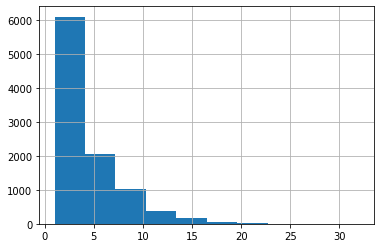

In [29]:
df.sum(axis=1).hist()

In [30]:
df.sum(axis=1).describe()

count    9835.000000
mean        4.409456
std         3.589385
min         1.000000
25%         2.000000
50%         3.000000
75%         6.000000
max        32.000000
dtype: float64

Analicemos cuántas de las compras contienen sólo 1 ítem y cuántas menos de 10 ítems

In [31]:
len(df[df.sum(axis=1)==1])/len(df)*100

21.952211489578037

In [32]:
len(df[df.sum(axis=1)<10])/len(df)*100

90.88967971530249

## Algoritmo apriori 

Con la función apriori podemos obtener los conjuntos de ítems más frecuentes de la matriz de 1s y 0s. El argumento de min_support es con el cuál definimos qué tan frecuentes son estos conjuntos de ítems. 

Un soporte mínimo de 0.20 implica que los conjuntos de ítems se encuentran en al menos 20% de las transacciones

In [ ]:
freqitems = apriori(df, min_support=0.001, use_colnames=True, verbose=1)

Processing 411195 combinations | Sampling itemset size 3

In [ ]:
freqitems.sort_values('support',ascending=False)[0:10]

Tenemos productos como la *leche/whole milk* que aparece en el 25% de las transacciones o la *gaseosa/soda* que está en 17% de las transacciones 

## Reglas de asociación

Con los conjuntos de ítems frecuentes definidos ya podemos estructurar qué reglas son válidas en este caso

In [ ]:
rules = association_rules(freqitems, metric="confidence", min_threshold=0.5)

In [ ]:
rules[0:10]

In [ ]:
rules.sort_values('confidence',ascending=False)[0:10]

**¿Cómo podemos interpretar esta tabla?**

Tenemos baking powder → whole milk {antecedente → consecuente}

Esto quiere decir que cuando se compra baking powder también se compra whole milk 

antecedente: el el ítem que soporta el otro ítem

consecuente: es el ítem suportado por el ítem de antecedente

antecedent support: es el soporte del antecedente. Ejemplo: baking powder se encuentra en el 1.7% de las compras

consequent support: es el soporte del consecuente. Ejemplo: whole milk se encuentra en el 25% de las compras

support: Es el soporte del antecedente y consecuente juntos. Ejemplo: 0.9% de las compras contienen tanto whole milk como baking powder

confidence: En 52% de las compras donde buttert fue comprada, la compra también incluyó whole milk

lift: Mayor a 1 indica que es probable que los productos sean comprados juntos


In [ ]:
plt.scatter(rules['support'],rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

## Ejercicios

1. ¿Cuáles reglas parecen interesantes de esta salida?

2. ¿ Cuáles reglas podrían ser 'poco' interesantes?

3. Utilizando la métrica de 'lift', ¿Cuáles serían algunas de las reglas más interesantes?

4. ¿Qué pasa si utilizamos diferentes niveles de soporte y confianza? Se llega a otras reglas más interesantes?

## Conclusiones

- Las tablas de datos transaccionales requieren de un manejo diferente a las tablas tradicionales y requieren de transformación en la mayoría de casos para su análisis

- Conocer los ítems más frecuentes permite sacar conclusiones interesantes sobre las compras

- La aplicación de las reglas de asociación es bastante sencilla